In [22]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import ExploratoryAnalysis.data_processing_modules as dpm

In [23]:
embedded_news = pd.read_csv('MIND_small/csv/news_with_embedding_cols.csv')

In [24]:
embedded_news.drop(columns='Unnamed: 0', inplace=True)

In [25]:
embedded_news = embedded_news[(embedded_news['abstract'].isna() == False) & (embedded_news['abstract_embeddings'] != '[0]')]

In [26]:
embedded_news.drop(columns=['abstract_entities', 'title_entities'], inplace=True)

In [27]:
embedded_news.drop(columns='url', inplace=True)

In [28]:
import ast
import re

In [29]:
strmp=""" 
[array([-1.5246984e+00,  1.8663328e+00, -5.8285242e-01, -1.4359504e-03,
        9.6623641e-01,  5.2032578e-01, -1.0313693e+00,  5.4425794e-01],
      dtype=float32)]"""

In [30]:
def string_to_numpy_array(input_str):
    # Remove the leading and trailing parts and clean up the string

    processed_string = input_str.replace("\n        ", " ").replace("[array(", "").replace('\n', '').replace(', dtype=float32)]', '')
    
    clean_str = ' '.join(processed_string.split())
    clean_str = clean_str.replace(', dtype=float32)]', '')
    
    # Convert string to list
    # Convert list to numpy array
    numpy_array = list(eval(clean_str))
    return numpy_array


def parse_numbers(str_array):
    """
    Parses a column in a dataframe creating numpy arrays for it.
    """
    
    numbers = re.findall(r"[-+]?\d*\.\d+|\d+", str_array)
    numbers = numbers[:-1]
    return [float(num) for num in numbers]


In [31]:
print(string_to_numpy_array(strmp))

[-1.5246984, 1.8663328, -0.58285242, -0.0014359504, 0.96623641, 0.52032578, -1.0313693, 0.54425794]


In [32]:
embedded_news = embedded_news.loc[embedded_news.abstract_embeddings.isna() == False]

In [33]:
embedded_news['abstract_embeddings'] = embedded_news['abstract_embeddings'].apply(lambda x : string_to_numpy_array(x))
embedded_news

,news_id,category,sub_category,title,abstract,abstract_embeddings,title_embeddings
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...","[-1.5727787, 1.8557202, -0.49339396, -0.037780...","[array([-1.4409549 , 1.8235254 , -0.4395721 ,..."
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,"[-1.6364906, 1.9199128, -0.7183229, -0.1693433...","[array([-1.6130608 , 1.8325022 , -0.6911162 ,..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,"[-1.540791, 1.7421103, -0.51404333, 0.01221262...","[array([-1.3382038 , 1.6106737 , -0.6302434 ,..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...","[-1.4924173, 1.8759879, -0.79957354, 0.0110163...","[array([-1.4797212 , 1.9302158 , -0.55494785,..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...","[-1.4244565, 1.7373042, -0.66064656, -0.150412...","[array([-1.6025547 , 1.6466968 , -0.67363775,..."
...,...,...,...,...,...,...,...
51275,N17258,news,newsscienceandtechnology,Realme takes chunk of India mobile market as S...,Over 400 percent more phones shipped year-on-year,"[-1.5022564, 1.6123784, -0.6322174, -0.1883140...","[array([-1.7429876 , 1.7126417 , -0.828466 ,..."
51276,N23858,sports,golf,Young Northeast Florida fans flock to U.S. wom...,When the U.S. women's national soccer team arr...,"[-1.4274988, 1.6246407, -0.75146884, -0.263381...","[array([-1.5352371 , 1.6979692 , -0.5817529 ,..."
51277,N16909,weather,weathertopstories,"Adapting, Learning And Soul Searching: Reflect...",Woolsey Fire Anniversary: A community is forev...,"[-1.466304, 1.8022219, -0.59260046, -0.2171193...","[array([-1.4519402 , 1.8643162 , -0.62555987,..."
51279,N7482,sports,more_sports,St. Dominic soccer player tries to kick cancer...,"Sometimes, what happens on the sidelines can b...","[-1.4769235, 1.6623629, -0.7299182, -0.2090537...","[array([-1.7586443 , 1.7391852 , -0.4290081 ,..."


In [34]:
embedded_news['title_embeddings'] = embedded_news['title_embeddings'].apply(lambda x : string_to_numpy_array(x))
embedded_news

,news_id,category,sub_category,title,abstract,abstract_embeddings,title_embeddings
0,N55528,lifestyle,lifestyleroyals,"The Brands Queen Elizabeth, Prince Charles, an...","Shop the notebooks, jackets, and more that the...","[-1.5727787, 1.8557202, -0.49339396, -0.037780...","[-1.4409549, 1.8235254, -0.4395721, -0.2339760..."
1,N19639,health,weightloss,50 Worst Habits For Belly Fat,These seemingly harmless habits are holding yo...,"[-1.6364906, 1.9199128, -0.7183229, -0.1693433...","[-1.6130608, 1.8325022, -0.6911162, -0.3315588..."
2,N61837,news,newsworld,The Cost of Trump's Aid Freeze in the Trenches...,Lt. Ivan Molchanets peeked over a parapet of s...,"[-1.540791, 1.7421103, -0.51404333, 0.01221262...","[-1.3382038, 1.6106737, -0.6302434, -0.2192540..."
3,N53526,health,voices,I Was An NBA Wife. Here's How It Affected My M...,"I felt like I was a fraud, and being an NBA wi...","[-1.4924173, 1.8759879, -0.79957354, 0.0110163...","[-1.4797212, 1.9302158, -0.55494785, -0.245799..."
4,N38324,health,medical,"How to Get Rid of Skin Tags, According to a De...","They seem harmless, but there's a very good re...","[-1.4244565, 1.7373042, -0.66064656, -0.150412...","[-1.6025547, 1.6466968, -0.67363775, -0.380335..."
...,...,...,...,...,...,...,...
51275,N17258,news,newsscienceandtechnology,Realme takes chunk of India mobile market as S...,Over 400 percent more phones shipped year-on-year,"[-1.5022564, 1.6123784, -0.6322174, -0.1883140...","[-1.7429876, 1.7126417, -0.828466, -0.12176843..."
51276,N23858,sports,golf,Young Northeast Florida fans flock to U.S. wom...,When the U.S. women's national soccer team arr...,"[-1.4274988, 1.6246407, -0.75146884, -0.263381...","[-1.5352371, 1.6979692, -0.5817529, -0.3178700..."
51277,N16909,weather,weathertopstories,"Adapting, Learning And Soul Searching: Reflect...",Woolsey Fire Anniversary: A community is forev...,"[-1.466304, 1.8022219, -0.59260046, -0.2171193...","[-1.4519402, 1.8643162, -0.62555987, -0.319431..."
51279,N7482,sports,more_sports,St. Dominic soccer player tries to kick cancer...,"Sometimes, what happens on the sidelines can b...","[-1.4769235, 1.6623629, -0.7299182, -0.2090537...","[-1.7586443, 1.7391852, -0.4290081, -0.2251083..."


In [35]:
meep = embedded_news.drop(columns=['title', 'abstract'])
meep

,news_id,category,sub_category,abstract_embeddings,title_embeddings
0,N55528,lifestyle,lifestyleroyals,"[-1.5727787, 1.8557202, -0.49339396, -0.037780...","[-1.4409549, 1.8235254, -0.4395721, -0.2339760..."
1,N19639,health,weightloss,"[-1.6364906, 1.9199128, -0.7183229, -0.1693433...","[-1.6130608, 1.8325022, -0.6911162, -0.3315588..."
2,N61837,news,newsworld,"[-1.540791, 1.7421103, -0.51404333, 0.01221262...","[-1.3382038, 1.6106737, -0.6302434, -0.2192540..."
3,N53526,health,voices,"[-1.4924173, 1.8759879, -0.79957354, 0.0110163...","[-1.4797212, 1.9302158, -0.55494785, -0.245799..."
4,N38324,health,medical,"[-1.4244565, 1.7373042, -0.66064656, -0.150412...","[-1.6025547, 1.6466968, -0.67363775, -0.380335..."
...,...,...,...,...,...
51275,N17258,news,newsscienceandtechnology,"[-1.5022564, 1.6123784, -0.6322174, -0.1883140...","[-1.7429876, 1.7126417, -0.828466, -0.12176843..."
51276,N23858,sports,golf,"[-1.4274988, 1.6246407, -0.75146884, -0.263381...","[-1.5352371, 1.6979692, -0.5817529, -0.3178700..."
51277,N16909,weather,weathertopstories,"[-1.466304, 1.8022219, -0.59260046, -0.2171193...","[-1.4519402, 1.8643162, -0.62555987, -0.319431..."
51279,N7482,sports,more_sports,"[-1.4769235, 1.6623629, -0.7299182, -0.2090537...","[-1.7586443, 1.7391852, -0.4290081, -0.2251083..."


In [36]:
dumny_cats = pd.get_dummies(data=meep[['category', 'sub_category']], dtype=float)
zorp = pd.concat([meep, dumny_cats], axis=1)

In [37]:
zorp.drop(columns=['category', 'sub_category'])

,news_id,abstract_embeddings,title_embeddings,category_autos,category_entertainment,category_finance,category_foodanddrink,category_health,category_kids,category_lifestyle,...,sub_category_voices,sub_category_watch,sub_category_weatherfullscreenmaps,sub_category_weathertopstories,sub_category_weight-loss,sub_category_weightloss,sub_category_wellness,sub_category_wines,sub_category_wonder,sub_category_yearinoffbeatgoodnews
0,N55528,"[-1.5727787, 1.8557202, -0.49339396, -0.037780...","[-1.4409549, 1.8235254, -0.4395721, -0.2339760...",0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,N19639,"[-1.6364906, 1.9199128, -0.7183229, -0.1693433...","[-1.6130608, 1.8325022, -0.6911162, -0.3315588...",0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,N61837,"[-1.540791, 1.7421103, -0.51404333, 0.01221262...","[-1.3382038, 1.6106737, -0.6302434, -0.2192540...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,N53526,"[-1.4924173, 1.8759879, -0.79957354, 0.0110163...","[-1.4797212, 1.9302158, -0.55494785, -0.245799...",0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,N38324,"[-1.4244565, 1.7373042, -0.66064656, -0.150412...","[-1.6025547, 1.6466968, -0.67363775, -0.380335...",0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51275,N17258,"[-1.5022564, 1.6123784, -0.6322174, -0.1883140...","[-1.7429876, 1.7126417, -0.828466, -0.12176843...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51276,N23858,"[-1.4274988, 1.6246407, -0.75146884, -0.263381...","[-1.5352371, 1.6979692, -0.5817529, -0.3178700...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
51277,N16909,"[-1.466304, 1.8022219, -0.59260046, -0.2171193...","[-1.4519402, 1.8643162, -0.62555987, -0.319431...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
51279,N7482,"[-1.4769235, 1.6623629, -0.7299182, -0.2090537...","[-1.7586443, 1.7391852, -0.4290081, -0.2251083...",0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
zeep = zorp.set_index('news_id')

In [39]:
zeep.loc[zeep['abstract_embeddings'].apply(lambda x : len(x)).idxmax()]

category                                                                      lifestyle
sub_category                                                            lifestyleroyals
abstract_embeddings                   [-1.5727787, 1.8557202, -0.49339396, -0.037780...
title_embeddings                      [-1.4409549, 1.8235254, -0.4395721, -0.2339760...
category_autos                                                                      0.0
                                                            ...                        
sub_category_weightloss                                                             0.0
sub_category_wellness                                                               0.0
sub_category_wines                                                                  0.0
sub_category_wonder                                                                 0.0
sub_category_yearinoffbeatgoodnews                                                  0.0
Name: N55528, Length: 280, dtype

In [40]:
abstracts = pd.DataFrame(zeep['abstract_embeddings'].to_list(), index=zeep.index)
titles = pd.DataFrame(zeep['title_embeddings'].to_list(), index=zeep.index)
titles

,0,1,2,3,4,5,6,7
news_id,,,,,,,,
N55528,-1.440955,1.823525,-0.439572,-0.233976,0.744187,0.710720,-1.181900,0.970425
N19639,-1.613061,1.832502,-0.691116,-0.331559,0.766748,0.863350,-1.181125,0.781984
N61837,-1.338204,1.610674,-0.630243,-0.219254,0.677268,0.702608,-0.886499,0.651225
N53526,-1.479721,1.930216,-0.554948,-0.245799,1.000331,0.646072,-1.104852,0.765704
N38324,-1.602555,1.646697,-0.673638,-0.380335,0.678377,0.912281,-1.165605,0.754905
...,...,...,...,...,...,...,...,...
N17258,-1.742988,1.712642,-0.828466,-0.121768,0.727630,0.770642,-1.011790,0.779273
N23858,-1.535237,1.697969,-0.581753,-0.317870,0.641722,0.624580,-0.854597,0.843228
N16909,-1.451940,1.864316,-0.625560,-0.319431,0.752892,0.700322,-0.995483,0.869000


In [41]:
titles.columns = ['{}_title'.format(title) for title in titles.columns]
abstracts.columns = ['{}_abstract'.format(title) for title in abstracts.columns]

In [42]:
zorp.set_index('news_id', inplace=True)


In [43]:
zorp = pd.concat([zorp, titles, abstracts], axis=1)
zorp

,category,sub_category,abstract_embeddings,title_embeddings,category_autos,category_entertainment,category_finance,category_foodanddrink,category_health,category_kids,...,6_title,7_title,0_abstract,1_abstract,2_abstract,3_abstract,4_abstract,5_abstract,6_abstract,7_abstract
news_id,,,,,,,,,,,,,,,,,,,,,
N55528,lifestyle,lifestyleroyals,"[-1.5727787, 1.8557202, -0.49339396, -0.037780...","[-1.4409549, 1.8235254, -0.4395721, -0.2339760...",0.0,0.0,0.0,0.0,0.0,0.0,...,-1.181900,0.970425,-1.572779,1.855720,-0.493394,-0.037780,0.728438,0.463786,-1.039312,0.785522
N19639,health,weightloss,"[-1.6364906, 1.9199128, -0.7183229, -0.1693433...","[-1.6130608, 1.8325022, -0.6911162, -0.3315588...",0.0,0.0,0.0,0.0,1.0,0.0,...,-1.181125,0.781984,-1.636491,1.919913,-0.718323,-0.169343,0.932392,0.515101,-1.063485,0.590943
N61837,news,newsworld,"[-1.540791, 1.7421103, -0.51404333, 0.01221262...","[-1.3382038, 1.6106737, -0.6302434, -0.2192540...",0.0,0.0,0.0,0.0,0.0,0.0,...,-0.886499,0.651225,-1.540791,1.742110,-0.514043,0.012213,0.822090,0.536763,-0.956459,0.794039
N53526,health,voices,"[-1.4924173, 1.8759879, -0.79957354, 0.0110163...","[-1.4797212, 1.9302158, -0.55494785, -0.245799...",0.0,0.0,0.0,0.0,1.0,0.0,...,-1.104852,0.765704,-1.492417,1.875988,-0.799574,0.011016,0.876861,0.520489,-1.161347,0.491944
N38324,health,medical,"[-1.4244565, 1.7373042, -0.66064656, -0.150412...","[-1.6025547, 1.6466968, -0.67363775, -0.380335...",0.0,0.0,0.0,0.0,1.0,0.0,...,-1.165605,0.754905,-1.424457,1.737304,-0.660647,-0.150412,1.060580,0.657792,-1.176526,0.723498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N17258,news,newsscienceandtechnology,"[-1.5022564, 1.6123784, -0.6322174, -0.1883140...","[-1.7429876, 1.7126417, -0.828466, -0.12176843...",0.0,0.0,0.0,0.0,0.0,0.0,...,-1.011790,0.779273,-1.502256,1.612378,-0.632217,-0.188314,0.553609,0.614533,-0.899606,0.822706
N23858,sports,golf,"[-1.4274988, 1.6246407, -0.75146884, -0.263381...","[-1.5352371, 1.6979692, -0.5817529, -0.3178700...",0.0,0.0,0.0,0.0,0.0,0.0,...,-0.854597,0.843228,-1.427499,1.624641,-0.751469,-0.263381,0.568501,0.666692,-1.060043,0.781709
N16909,weather,weathertopstories,"[-1.466304, 1.8022219, -0.59260046, -0.2171193...","[-1.4519402, 1.8643162, -0.62555987, -0.319431...",0.0,0.0,0.0,0.0,0.0,0.0,...,-0.995483,0.869000,-1.466304,1.802222,-0.592600,-0.217119,0.758318,0.756759,-1.254891,0.903519


In [44]:
zeep = zorp.drop(columns=['sub_category','abstract_embeddings','title_embeddings'])

In [50]:
zeep

,category,category_autos,category_entertainment,category_finance,category_foodanddrink,category_health,category_kids,category_lifestyle,category_middleeast,category_movies,...,6_title,7_title,0_abstract,1_abstract,2_abstract,3_abstract,4_abstract,5_abstract,6_abstract,7_abstract
news_id,,,,,,,,,,,,,,,,,,,,,
N55528,lifestyle,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,-1.181900,0.970425,-1.572779,1.855720,-0.493394,-0.037780,0.728438,0.463786,-1.039312,0.785522
N19639,health,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.181125,0.781984,-1.636491,1.919913,-0.718323,-0.169343,0.932392,0.515101,-1.063485,0.590943
N61837,news,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.886499,0.651225,-1.540791,1.742110,-0.514043,0.012213,0.822090,0.536763,-0.956459,0.794039
N53526,health,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.104852,0.765704,-1.492417,1.875988,-0.799574,0.011016,0.876861,0.520489,-1.161347,0.491944
N38324,health,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,-1.165605,0.754905,-1.424457,1.737304,-0.660647,-0.150412,1.060580,0.657792,-1.176526,0.723498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
N17258,news,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.011790,0.779273,-1.502256,1.612378,-0.632217,-0.188314,0.553609,0.614533,-0.899606,0.822706
N23858,sports,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.854597,0.843228,-1.427499,1.624641,-0.751469,-0.263381,0.568501,0.666692,-1.060043,0.781709
N16909,weather,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.995483,0.869000,-1.466304,1.802222,-0.592600,-0.217119,0.758318,0.756759,-1.254891,0.903519


In [45]:
morp = meep.set_index('news_id')

In [56]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Dimension reduction and clustering libraries
import umap.umap_ as umap

import hdbscan
import sklearn.cluster as cluster
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score

/Users/nick/miniforge3/envs/recSysEnv/lib/python3.9/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


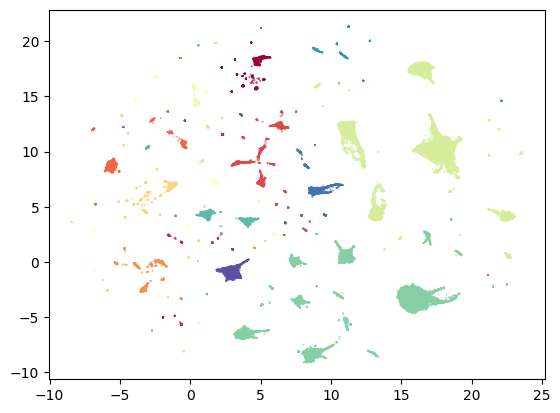

In [60]:

label_encoder = LabelEncoder()
zeep['category'] = label_encoder.fit_transform(zeep['category'])
standard_embedding = umap.UMAP(random_state=42).fit_transform(zeep[zeep.columns[1:]])
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=zeep['category'], s=0.1, cmap='Spectral');

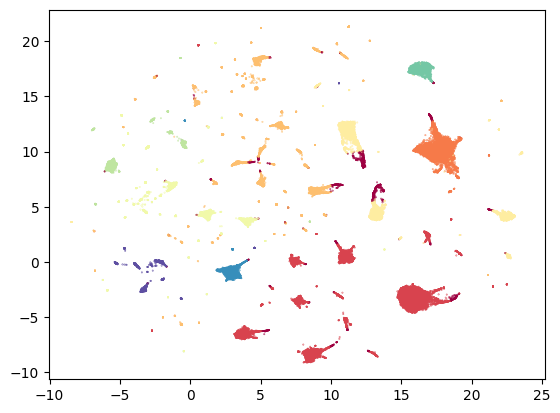

In [61]:
kmeans_labels = cluster.KMeans(n_clusters=10).fit_predict(zeep[zeep.columns[1:]])
plt.scatter(standard_embedding[:, 0], standard_embedding[:, 1], c=kmeans_labels, s=0.1, cmap='Spectral');

